## Central Ohio Transit Authority Trip Passenger Data
Written by Eric Englin
11/9/19

### Problem Description
**COTA Unlinked Passenger Trips Data for Weekday - January Trimester 2019**

This dataset identifies unlinked passenger trips of COTA riders at all bus stops in Central Ohio. These onboarding and alighting counts are computed through "Automatic Passenger Counters" (APCs) that detect passengers when they enter and exit. The APC data is averaged every trimester and reports are generated. APCs are not installed in all COTA buses and hence daily onboarding and alighting values are not consistent.

Data found [here](https://discovery.smartcolumbusos.com/dataset/central_ohio_transit_authority/601d7cf2_82d9_4a66_8f37_fff5392ab617) on Smart Columbus OS open data portal. 


In [20]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import math


In [3]:
url = 'https://data.smartcolumbusos.com/api/v1/dataset/601d7cf2-82d9-4a66-8f37-fff5392ab617/download?_format=csv'
urllib.request.urlretrieve(url, './COTA-passenger-data.csv')


('./COTA-passenger-data.csv', <http.client.HTTPMessage at 0x109b600f0>)

In [32]:
df = pd.read_csv("COTA-passenger-data.csv")

In [33]:
df.head()

,day_avg_dwell,day_of_week,lat,long,off,on,route,stop_name,total,trip_avg_dwell,unique_stop_number
0,146.7,WEEKDAY,39.962817,-83.000750,210,276,1,N HIGH ST & W BROAD ST,485,1.9,2900
1,2.7,WEEKDAY,39.979758,-83.032003,0,3,31,W 1ST AVE & NORTHWEST BL,3,0.1,2911
2,0.9,WEEKDAY,39.979910,-83.034480,2,0,13,W 1ST AVE & OXLEY RD,2,0.3,2912
3,4.3,WEEKDAY,39.979936,-83.034509,0,7,31,W 1ST AVE & OXLEY RD,7,0.1,2912
4,0.4,WEEKDAY,39.981031,-83.037605,1,0,13,W 1ST AVE & VIRGINIA AVE,1,0.1,2913


In [34]:
len(df)

4378

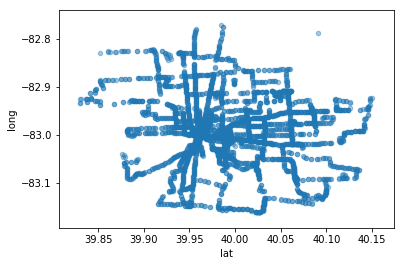

In [35]:
df.plot(kind="scatter", x="lat", y="long", alpha=0.4)
plt.show()

In [37]:
def merc(Coords):
    Coordinates = literal_eval(Coords)
    lat = Coordinates[0]
    lon = Coordinates[1]
    
    r_major = 6378137.000
    x = r_major * math.radians(lon)
    scale = x/lon
    y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + 
        lat * (math.pi/180.0)/2.0)) * scale
    return (x, y)



In [68]:
long2 = []

for x in df["long"]:
    y = str(x)
    long2.append(y)

lat2 = []
for x in df["lat"]:
    y = str(x)
    lat2.append(y)

df["long2"]=long2
df["lat2"]=lat2

df['Coords']= "(" + df['lat2'] + ", " + df['long2'] + ")"
df[['Coords','lat','long','lat2','long2']].head()

,Coords,lat,long,lat2,long2
0,"(39.962817, -83.00075)",39.962817,-83.000750,39.962817,-83.00075
1,"(39.979758000000004, -83.032003)",39.979758,-83.032003,39.979758000000004,-83.032003
2,"(39.97991, -83.03448)",39.979910,-83.034480,39.97991,-83.03448
3,"(39.979936, -83.034509)",39.979936,-83.034509,39.979936,-83.034509
4,"(39.981031, -83.037605)",39.981031,-83.037605,39.981031,-83.037605


In [73]:
df['coords_x'] = df['Coords'].apply(lambda x: merc(x)[0])
df['coords_y'] = df['Coords'].apply(lambda x: merc(x)[1])

In [70]:
df.columns

Index(['day_avg_dwell', 'day_of_week', 'lat', 'long', 'off', 'on', 'route',
       'stop_name', 'total', 'trip_avg_dwell', 'unique_stop_number', 'long2',
       'lat2', 'Coords', 'coords_x', 'coords_y', 'total_adjusted'],
      dtype='object')

In [74]:
df.describe()

,day_avg_dwell,lat,long,off,on,route,total,trip_avg_dwell,unique_stop_number,coords_x,coords_y,total_adjusted
count,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4.378000e+03,4.378000e+03,4378.000000
mean,21.263385,39.994551,-82.990208,12.944267,12.641389,26.841480,25.619689,0.410347,4551.405665,-9.238428e+06,4.865154e+06,0.025620
std,106.152581,0.058476,0.072512,28.827195,29.036799,31.896021,52.955673,1.492096,2319.678327,8.071952e+03,8.497834e+03,0.052956
min,0.000000,39.830177,-83.162121,0.000000,0.000000,1.000000,0.000000,0.000000,36.000000,-9.257565e+06,4.841295e+06,0.000000
25%,1.200000,39.955480,-83.027725,1.000000,1.000000,6.000000,3.000000,0.100000,2448.750000,-9.242604e+06,4.859475e+06,0.003000
50%,4.000000,39.985020,-82.995548,3.000000,3.000000,11.000000,8.000000,0.100000,4237.000000,-9.239022e+06,4.863766e+06,0.008000
75%,10.400000,40.034305,-82.949076,12.000000,11.000000,33.000000,24.000000,0.300000,6904.500000,-9.233849e+06,4.870929e+06,0.024000
max,1629.200000,40.150460,-82.772149,544.000000,585.000000,152.000000,1080.000000,21.200000,8116.000000,-9.214153e+06,4.887831e+06,1.080000


In [97]:
from bokeh.plotting import figure, show, output_notebook, save, output_file
from bokeh.tile_providers import CARTODBPOSITRON
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Spectral6
from bokeh.transform import linear_cmap


df["total_adjusted"]=df['total']/50

source = ColumnDataSource(data=dict(
                        x=list(df['coords_x']), 
                        y=list(df['coords_y']),
                        off = list(df['off']),
                        on = list(df['on']),
                        stop = list(df['stop_name']),
                        sizes=list(df['total_adjusted']),
                        riders=list(df['total'])))


hover = HoverTool(tooltips=[
    ("2019 riders","@riders{0,0}"),
    ("stop", "@stop"),
    ("On",'@on'),
    ("Off",'@off')
])


p = figure(plot_width=1000, plot_height=700,
           x_range=(-9258000, -9210000), y_range=(4840000, 4890000),
           x_axis_type="mercator", y_axis_type="mercator",
           tools=[hover,'reset', 'wheel_zoom','pan','box_zoom','save'],
          title="2019 Riders")

p.add_tile(CARTODBPOSITRON)
p.title.text_font_size = '14pt'


p.circle(x='x',
         y='y',
         source=source,
         line_color="#FF0000", 
         fill_color="#FF0000",
         size='sizes',
         fill_alpha=0.05)

output_file("COTA-riders.html")

output_notebook()
save(p)

Loading BokehJS ...

'/Users/ericenglin/Desktop/PAE/COTA-passenger-trips/COTA-riders.html'

In [107]:
keys_df = pd.read_csv("Google Map API Key.csv")
APP_KEY = keys_df['API Key'].iloc[0]

In [108]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap


map_options = GMapOptions(lat=39.985020, lng=-82.995548, map_type="roadmap", zoom=11)

# For GMaps to function, Google requires you obtain and enable an API key:
#
#     https://developers.google.com/maps/documentation/javascript/get-api-key
#
# Replace the value below with your personal API key:
p = gmap(APP_KEY, map_options, title="Austin")

source = ColumnDataSource(data=dict(
                        x=list(df['coords_x']), 
                        y=list(df['coords_y']),
                        off = list(df['off']),
                        on = list(df['on']),
                        stop = list(df['stop_name']),
                        sizes=list(df['total_adjusted']),
                        riders=list(df['total'])))


hover = HoverTool(tooltips=[
    ("2019 riders","@riders{0,0}"),
    ("stop", "@stop"),
    ("On",'@on'),
    ("Off",'@off')
])




p.circle(x='x',
         y='y',
         source=source,
         line_color="#FF0000", 
         fill_color="#FF0000",
         size='sizes',
         fill_alpha=0.05)

output_file("gmap.html")
output_notebook()
save(p)


Loading BokehJS ...

'/Users/ericenglin/Desktop/PAE/COTA-passenger-trips/gmap.html'